Decision Trees:
* classification and Regression
* Linear & non linear data
* Algorithm learns Tree

Tree contains:
    * Root node : The first node in the tree
    * Decision Node : To take decision
    * Leaf Node : Result node

The nodes will be decided based on the measurements:
  * Entropy
  * Gini

Entropy:

    Entropy is a measure of impurity or disorder in a set of data.

    For a binary classification problem, the entropy of a set S is given by:

    Entropy(S)=−p1log⁡2(p1)−p2log⁡2(p2)
    

    where p1​ and p2​ are the proportions of the two classes in the set.

Information Gain:

    Information gain is the reduction in entropy or uncertainty after splitting a dataset based on a feature.

    The formula for information gain (IG) is given by:
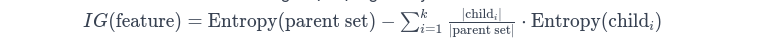
    
    where k is the number of child nodes after the split, ∣childi∣ is the number of data points in child node ii, and ∣parent set∣ is the number of data points in the parent set.

  Decision Tree Splitting Criteria:

    When constructing a decision tree, the algorithm selects the feature that maximizes information gain at each node.
    The process is recursively applied to create a tree structure, where nodes represent decisions based on feature values.
  High Information Gain:

    A high information gain indicates that the chosen feature effectively reduces uncertainty about the target variable.
    Features with higher information gain are considered more relevant for making decisions.

Gini:
The Gini impurity measures the degree of inequality or impurity in a set of class labels. It is calculated by summing the probabilities of each class being chosen squared, and then subtracting this sum from 1. A Gini impurity of 0 indicates that the set is completely pure (all elements belong to the same class), while a Gini impurity of 0.5 indicates maximum impurity (the elements are evenly distributed across all classes).

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split

Feature Importance (Information Gain):
Feature 0: 0.0
Feature 1: 0.016670139612419255
Feature 2: 0.9061433868879218
Feature 3: 0.07718647349965893


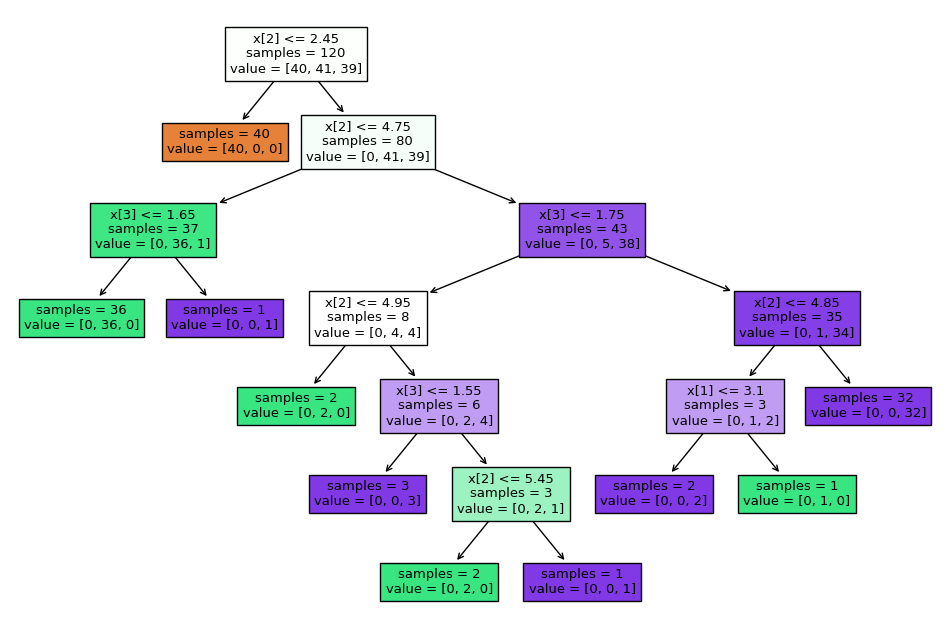

In [ ]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Calculate Information Gain (feature importance)
information_gain = clf.feature_importances_

# Print Information Gain for each feature
print("Feature Importance (Information Gain):")
for i, importance in enumerate(information_gain):
    print(f"Feature {i}: {importance}")


plt.figure(figsize=(12,8))
plot_tree(
    clf,
    filled=True,

    impurity=False
)

plt.show()

##Rain Classification

In [ ]:
import pandas as pd

df_umbrella=pd.DataFrame(
    {
        'Chance of Rainy':[0.1,0.9,0.3,0.1],
        'UV Index':[11,1,3,2],
        'Umbrella':[True,True,False,False]
    }
)

df_umbrella.head()

,Chance of Rainy,UV Index,Umbrella
0,0.1,11,True
1,0.9,1,True
2,0.3,3,False
3,0.1,2,False


In [ ]:
features=['Chance of Rainy','UV Index']
Target=['Umbrella']



In [ ]:
clf = DecisionTreeClassifier().fit(df_umbrella[features],df_umbrella[Target])

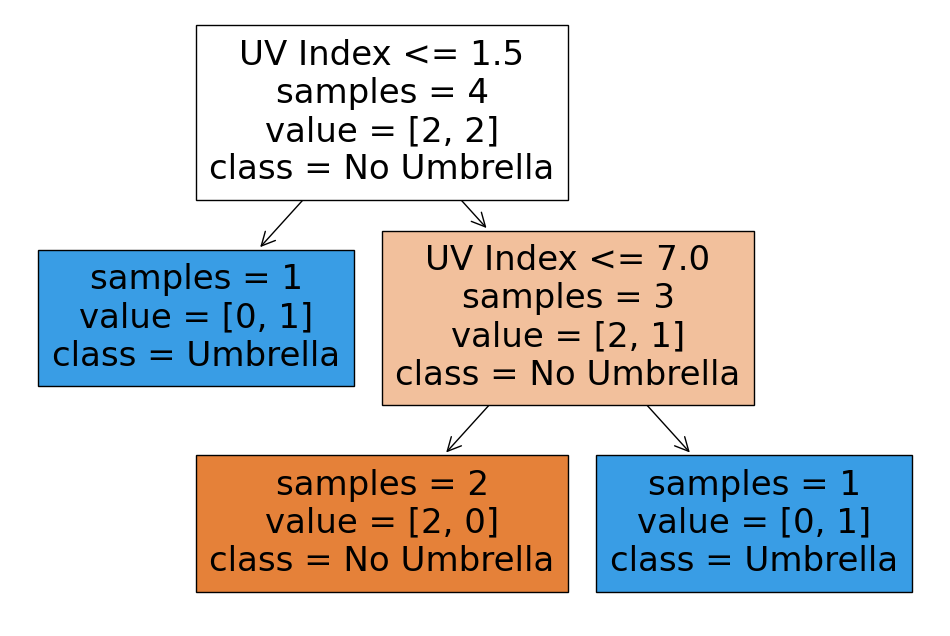

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(
    clf,
    filled=True,
    feature_names=features,
    class_names=['No Umbrella','Umbrella'],
    impurity=False
)

plt.show()

In [ ]:
df_umbrella['UV Index'][df_umbrella['Umbrella']==True]

0    11
1     1
Name: UV Index, dtype: int64

<Figure size 1000x500 with 0 Axes>

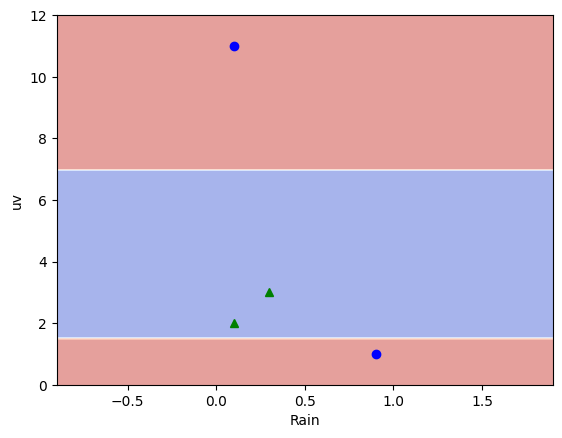

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(10,5))
disp = DecisionBoundaryDisplay.from_estimator(clf,
                                              df_umbrella[features],
                                              response_method='predict',
                                              xlabel='Rain',
                                              ylabel='uv',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

plt.plot(df_umbrella['Chance of Rainy'][df_umbrella['Umbrella']==True],df_umbrella['UV Index'][df_umbrella['Umbrella']==True],'bo')
plt.plot(df_umbrella['Chance of Rainy'][df_umbrella['Umbrella']==False],df_umbrella['UV Index'][df_umbrella['Umbrella']==False],'g^')
plt.show()

In [ ]:
iris = load_iris(as_frame=True)
X_iris = iris.data[['petal length (cm)','petal width (cm)']].values
y_iris = iris.target


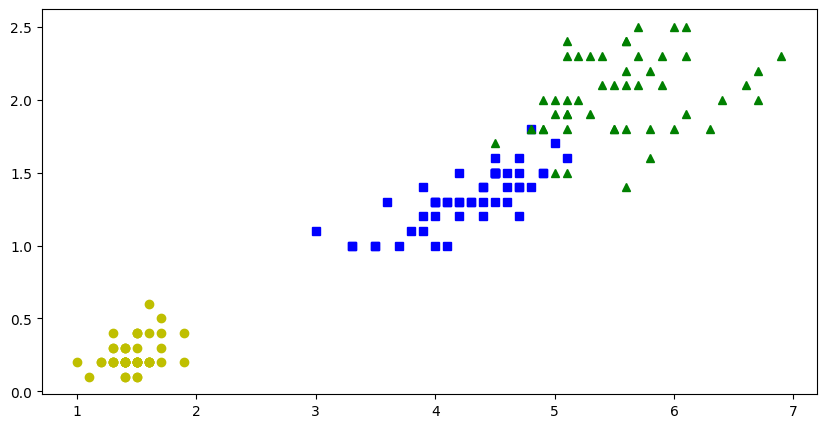

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(X_iris[:,0][y_iris==0],X_iris[:,1][y_iris==0],'yo')
plt.plot(X_iris[:,0][y_iris==1],X_iris[:,1][y_iris==1],'bs')
plt.plot(X_iris[:,0][y_iris==2],X_iris[:,1][y_iris==2],'g^')
plt.show()

In [ ]:
tree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
tree_clf.fit(X_iris,y_iris)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

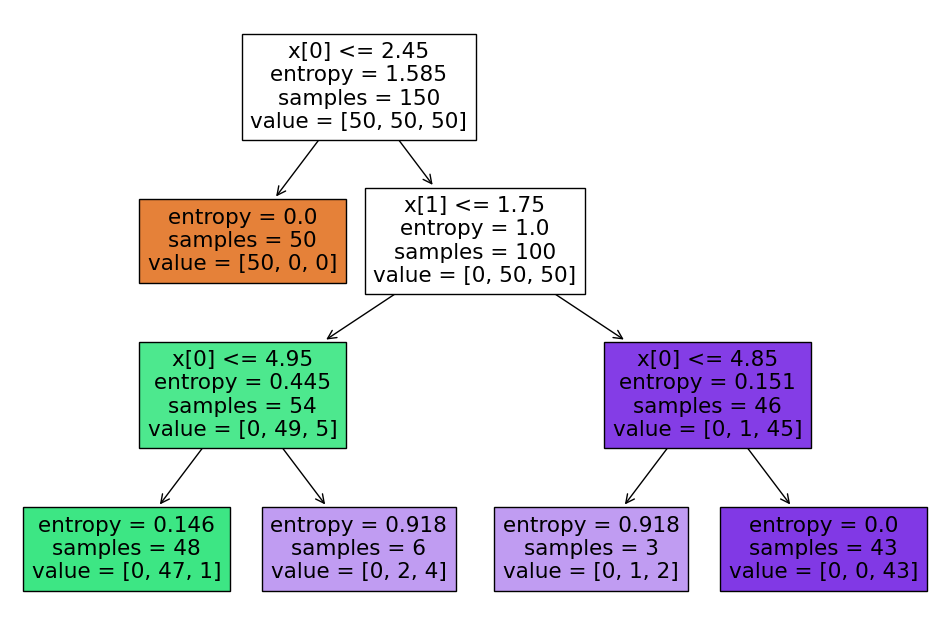

<Figure size 1000x500 with 0 Axes>

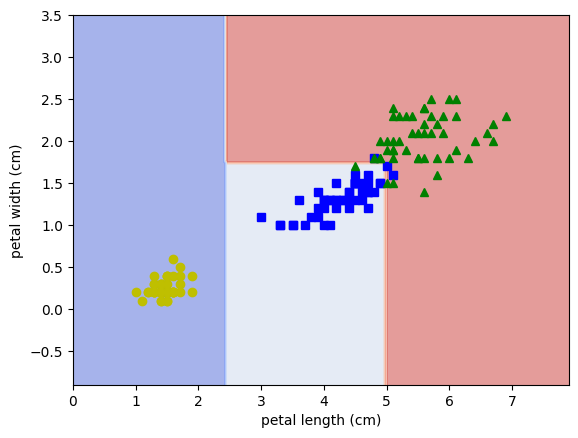

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(
    tree_clf,
    filled=True
)

plt.show()
plt.figure(figsize=(10,5))
disp = DecisionBoundaryDisplay.from_estimator(tree_clf,
                                              X_iris,

                                              response_method='predict',
                                              xlabel='petal length (cm)',
                                              ylabel='petal width (cm)',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

plt.plot(X_iris[:,0][y_iris==0],X_iris[:,1][y_iris==0],'yo')
plt.plot(X_iris[:,0][y_iris==1],X_iris[:,1][y_iris==1],'bs')
plt.plot(X_iris[:,0][y_iris==2],X_iris[:,1][y_iris==2],'g^')
plt.show()

## Hypertuning parameters

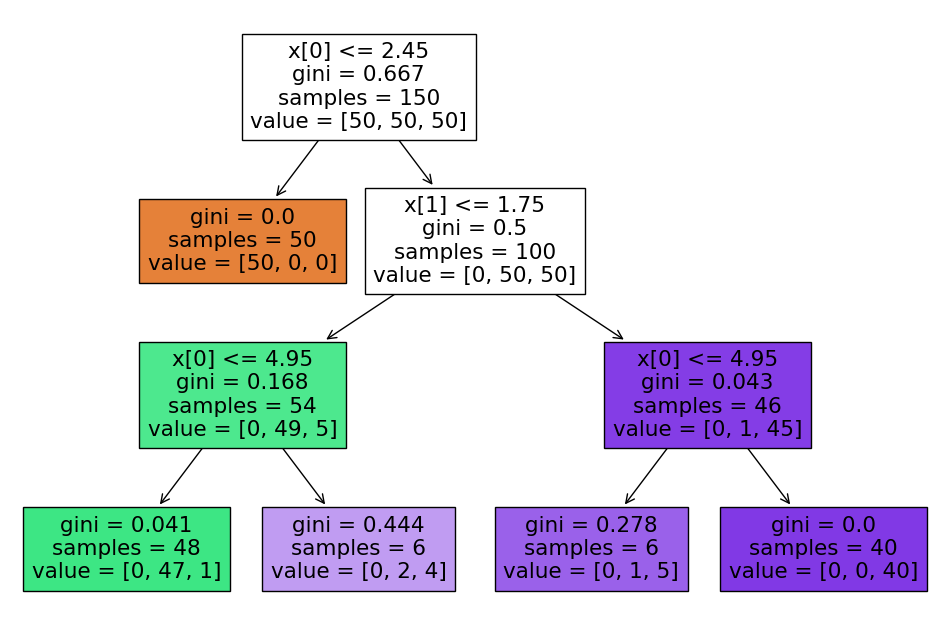

<Figure size 1000x500 with 0 Axes>

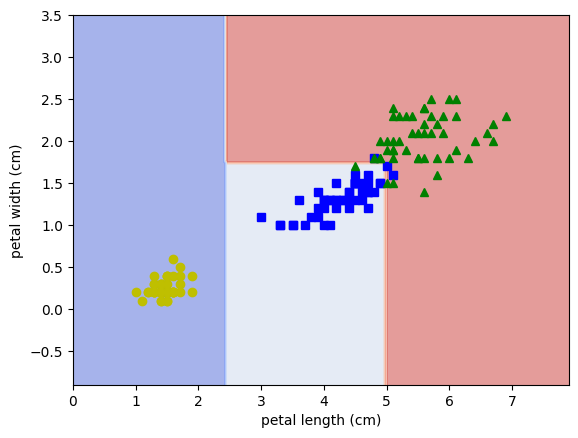

In [ ]:
tree_clf=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5,random_state=42)
tree_clf.fit(X_iris,y_iris)
plt.figure(figsize=(12,8))
plot_tree(
    tree_clf,
    filled=True
)

plt.show()
plt.figure(figsize=(10,5))
disp = DecisionBoundaryDisplay.from_estimator(tree_clf,
                                              X_iris,

                                              response_method='predict',
                                              xlabel='petal length (cm)',
                                              ylabel='petal width (cm)',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

plt.plot(X_iris[:,0][y_iris==0],X_iris[:,1][y_iris==0],'yo')
plt.plot(X_iris[:,0][y_iris==1],X_iris[:,1][y_iris==1],'bs')
plt.plot(X_iris[:,0][y_iris==2],X_iris[:,1][y_iris==2],'g^')
plt.show()

## DecisionTree as Regression Algorithm

In [ ]:
import numpy as np


In [ ]:
n=200

height_pop1_f = np.random.normal(loc=155,scale=4,size=n)
height_pop1_m = np.random.normal(loc=175,scale=5,size=n)

height_pop2_f = np.random.normal(loc=165,scale=15,size=n)
height_pop2_m = np.random.normal(loc=185,scale=12,size=n)

height_f=np.concatenate([height_pop1_f,height_pop2_f])
height_m=np.concatenate([height_pop1_m,height_pop2_m])


In [ ]:
df_height = pd.DataFrame(
    {
        'Gender':[1 for i in range(height_f.size)]+[2 for i in range(height_m.size)],
        'Height':np.concatenate([height_f,height_m])
    }
)

df_height.head()

,Gender,Height
0,1,153.038965
1,1,160.293107
2,1,149.963939
3,1,153.033507
4,1,158.345225


In [ ]:
df_height['Gender'].value_counts()

1    400
2    400
Name: Gender, dtype: int64

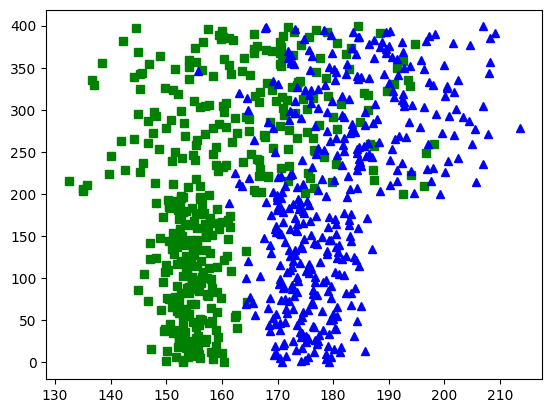

In [ ]:
plt.plot(df_height['Height'][df_height['Gender']==1],range(400),'gs')
plt.plot(df_height['Height'][df_height['Gender']==2],range(400),'b^')
plt.show()

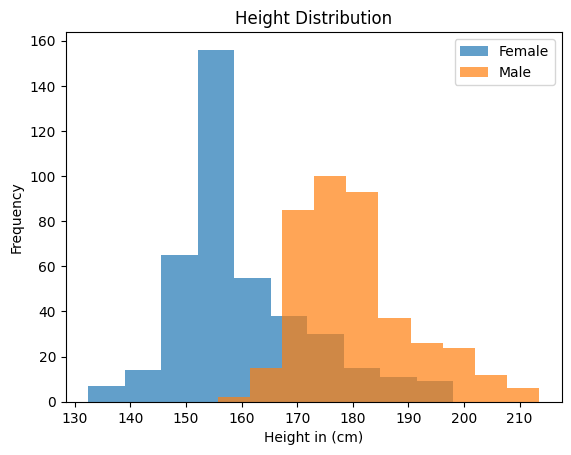

In [ ]:
df_height[df_height['Gender']==1]['Height'].plot(
    label='Female',kind='hist',bins=10,alpha=0.7
)

df_height[df_height['Gender']==2]['Height'].plot(
    label='Male',kind='hist',bins=10,alpha=0.7
)

plt.legend()
plt.title('Height Distribution')
plt.xlabel('Height in (cm)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df_height,test_size=0.3,random_state=42)

x_train=df_train[['Gender']]
x_test=df_train[['Gender']]

y_train = df_train[['Height']]
y_test = df_train[['Height']]

from sklearn.tree import DecisionTreeRegressor

reg_model = DecisionTreeRegressor()

reg_model.fit(x_train.values,y_train.values)


DecisionTreeRegressor()

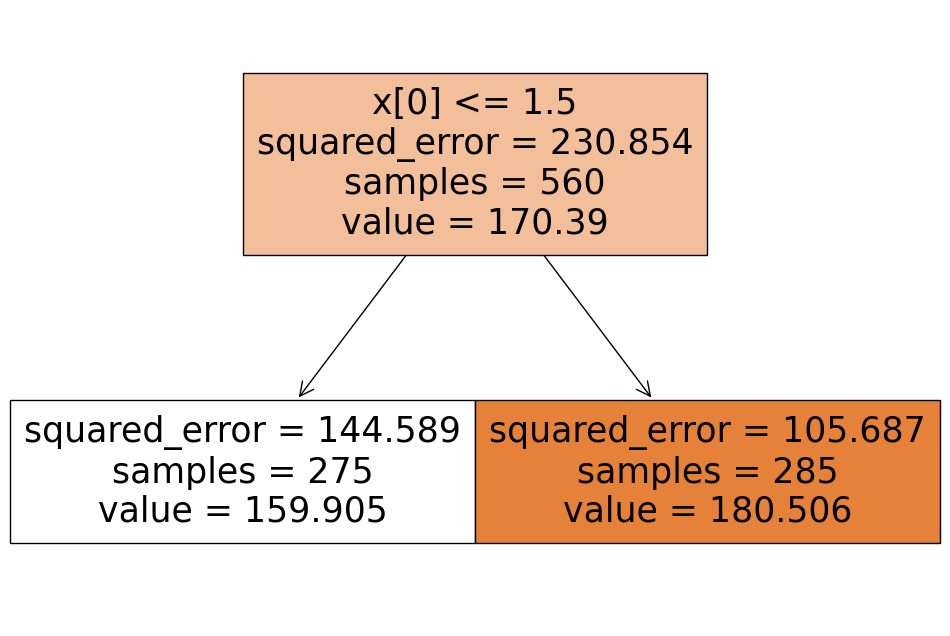

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(
    reg_model,
    filled=True
)
plt.show()

In [ ]:
df_height.groupby('Gender')[['Height']].agg([np.mean,np.median]).round(1)

Height       
         mean median
Gender              
1       159.8  156.3
2       180.4  178.7

#### For Regression it will predict based on the average of samples , that is how the value is coming as 159.905 in the leaf node.